<a href="https://colab.research.google.com/github/GvsSriRam/fantasy-name-generation-model/blob/main/Superhero_Name_Generator_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero (and Supervillain) Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

## Task 2

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [ ]:
!git clone https://github.com/am1tyadav/superhero

fatal: destination path 'superhero' already exists and is not an empty directory.


In [ ]:
with open('superhero/superheroes.txt') as f:
  data = f.read()

data[:100]

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrh'

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

In [ ]:
tokenizer.fit_on_texts(data)

In [ ]:
char_to_index = tokenizer.word_index
index_to_char = dict((v,k) for k,v in char_to_index.items())

index_to_char

{1: '\t',
 2: 'a',
 3: 'e',
 4: 'r',
 5: 'o',
 6: 'n',
 7: 'i',
 8: ' ',
 9: 't',
 10: 's',
 11: 'l',
 12: 'm',
 13: 'h',
 14: 'd',
 15: 'c',
 16: 'u',
 17: 'g',
 18: 'k',
 19: 'b',
 20: 'p',
 21: 'y',
 22: 'w',
 23: 'f',
 24: 'v',
 25: 'j',
 26: 'z',
 27: 'x',
 28: 'q'}

## Task 3

1. Converting between names and sequences

In [ ]:
names = data.splitlines()
names[:5]

['jumpa\t', 'doctor fate\t', 'starlight\t', 'isildur\t', 'lasher\t']

In [ ]:
tokenizer.texts_to_sequences(names[0])

[[25], [16], [12], [20], [2], [1]]

In [ ]:
def name_to_sequence(name):
  return [tokenizer.texts_to_sequences(c)[0][0] for c in name]

In [ ]:
name_to_sequence(names[0])

[25, 16, 12, 20, 2, 1]

In [ ]:
def sequence_to_name(seq):
  return "".join([index_to_char[i] for i in seq if i!=0])

In [ ]:
sequence_to_name(name_to_sequence(names[0]))

'jumpa\t'

## Task 4

1. Creating sequences
2. Padding all sequences

In [ ]:
sequences = []

for name in names:
  seq = name_to_sequence(name)
  if len (seq) >= 2: # to ensure the example looks good
    sequences += [seq[:i] for i in range(2, len(seq) + 1)]

In [ ]:
sequences[:10]

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4]]

In [ ]:
# specify max length - fixed length is ensured with '0' padding
max_len = max([len(x) for x in sequences])
max_len

33

In [ ]:
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences, padding='pre', maxlen = max_len
)

padded_sequences[:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,
        16],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25, 16,
        12],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25, 16, 12,
        20],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25, 16, 12, 20,
         2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25, 16, 12, 20,  2,
         1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,
         5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

In [ ]:
padded_sequences.shape

(88279, 33)

## Task 5: Creating Training and Validation Sets

1. Creating training and validation sets

In [ ]:
x, y = padded_sequences[:, :-1], padded_sequences[:, -1]
print(x.shape, y.shape)

(88279, 32) (88279,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(66209, 32) (66209,)
(22070, 32) (22070,)


In [ ]:
num_chars = len(char_to_index.keys()) + 1
print(num_chars)

29


## Task 6: Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, LSTM, Bidirectional, Dense

model = Sequential([
    Embedding(num_chars, 8, input_length=max_len-1), 
    Conv1D(64, 5, strides=1, activation='tanh', padding='causal'), #casual results in dilated, temporal order is not violated => output at a timestep depends on the previous timestep itself.
    MaxPool1D(2), #to reduce the output dimensions
    LSTM(32), # can use another LSTM to make it complex
    Dense(num_chars, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 32, 8)             232       
                                                                 
 conv1d_2 (Conv1D)           (None, 32, 64)            2624      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 16, 64)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 29)                957       
                                                                 
Total params: 16,229
Trainable params: 16,229
Non-trainable params: 0
__________________________________________________

## Task 7: Training the Model

In [ ]:
hist = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    verbose=2,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
        ]
)

Epoch 1/50
2070/2070 - 22s - loss: 2.7531 - accuracy: 0.1889 - val_loss: 2.5991 - val_accuracy: 0.2200 - 22s/epoch - 11ms/step
Epoch 2/50
2070/2070 - 11s - loss: 2.5526 - accuracy: 0.2318 - val_loss: 2.5019 - val_accuracy: 0.2502 - 11s/epoch - 5ms/step
Epoch 3/50
2070/2070 - 11s - loss: 2.4708 - accuracy: 0.2571 - val_loss: 2.4478 - val_accuracy: 0.2628 - 11s/epoch - 6ms/step
Epoch 4/50
2070/2070 - 11s - loss: 2.4215 - accuracy: 0.2730 - val_loss: 2.4137 - val_accuracy: 0.2720 - 11s/epoch - 5ms/step
Epoch 5/50
2070/2070 - 11s - loss: 2.3863 - accuracy: 0.2769 - val_loss: 2.3855 - val_accuracy: 0.2803 - 11s/epoch - 5ms/step
Epoch 6/50
2070/2070 - 11s - loss: 2.3564 - accuracy: 0.2870 - val_loss: 2.3578 - val_accuracy: 0.2856 - 11s/epoch - 5ms/step
Epoch 7/50
2070/2070 - 11s - loss: 2.3301 - accuracy: 0.2930 - val_loss: 2.3445 - val_accuracy: 0.2894 - 11s/epoch - 5ms/step
Epoch 8/50
2070/2070 - 11s - loss: 2.3067 - accuracy: 0.3005 - val_loss: 2.3253 - val_accuracy: 0.2955 - 11s/epoch - 

## Task 8: Generate Names!

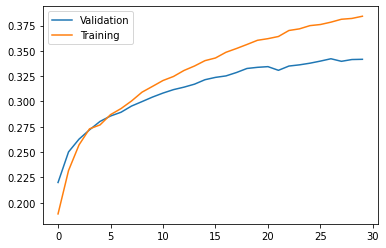

In [ ]:
from matplotlib import pyplot as plt
epochs_ran = len(hist.history['loss'])

plt.plot(range(0, epochs_ran), hist.history['val_accuracy'], label='Validation')
plt.plot(range(0, epochs_ran), hist.history['accuracy'], label='Training')
plt.legend()
plt.show()

In [ ]:
def generate_names(seed): # single char or sequence of chars
  for i in range(0, 40):
    seq = name_to_sequence(seed)
    padded = tf.keras.preprocessing.sequence.pad_sequences(
        [seq], padding='pre',
        maxlen=max_len-1, truncating='pre'
        )
    pred = model.predict(padded)[0]
    pred_char_index = tf.argmax(pred).numpy()
    pred_char = index_to_char[pred_char_index]
    
    if pred_char != '\t':
      seed += pred_char
    else:
      break
  return seed

In [ ]:
generate_names('x')

1/1 [==============================] - 0s 17ms/step


'xena surdon'